In [1]:
getwd()
setwd('C:/Users/User/Documents/stat2020/Ass2/6110503461_program')

[1] "C:/Users/User/Documents/stat2020/Ass2/6110503461_program"

#  
# Part 3.1 Hypothesis

In [2]:
df <- read.csv("ass2_hypo.csv", sep=",", header=T, fileEncoding="UTF-8-BOM")

In [3]:
x1 <- factor(df$Type)
x2 <- factor(df$more_th20)
anovaResult <- aov(df$exp_dis ~ x1*x2, data=df)
summary(anovaResult)

            Df Sum Sq Mean Sq F value Pr(>F)  
x1           1  262.4  262.43   3.202 0.0833 .
x2           1  165.4  165.43   2.019 0.1654  
x1:x2        1   36.6   36.60   0.447 0.5089  
Residuals   31 2540.5   81.95                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [4]:
attach(df)

In [5]:
names(df)

[1] "exp_dis"   "Type"      "more_th20"

In [6]:
class(Type)

[1] "factor"

In [7]:
levels(Type)

[1] "bts" "mrt"

In [8]:
# H0: mean expense/distance of BTS = BUS

In [9]:
t.test(exp_dis[Type=="bts"], exp_dis[Type=="mrt"])


	Welch Two Sample t-test

data:  exp_dis[Type == "bts"] and exp_dis[Type == "mrt"]
t = 1.9096, df = 22.225, p-value = 0.06918
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4693813 11.4628023
sample estimates:
mean of x mean of y 
 38.68421  33.18750 


#           
# Part 3.2 Anova on single factor   

In [10]:
df2 <- read.csv("ass2_anova1.csv", sep=",", header=T, fileEncoding="UTF-8-BOM")

In [11]:
timeFactor <- factor(df2$time)
anovaResult <- aov(df2$expense~timeFactor, data=df2)
summary(anovaResult)

            Df Sum Sq Mean Sq F value Pr(>F)  
timeFactor   2   1757   878.5   3.178  0.048 *
Residuals   67  18520   276.4                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [12]:
qf(0.99, 2, 67)

[1] 4.936718

In [13]:
qtukey(0.01, nmeans=anovaResult$rank, df=anovaResult$df.residual, lower.tail=F)

[1] 4.26479

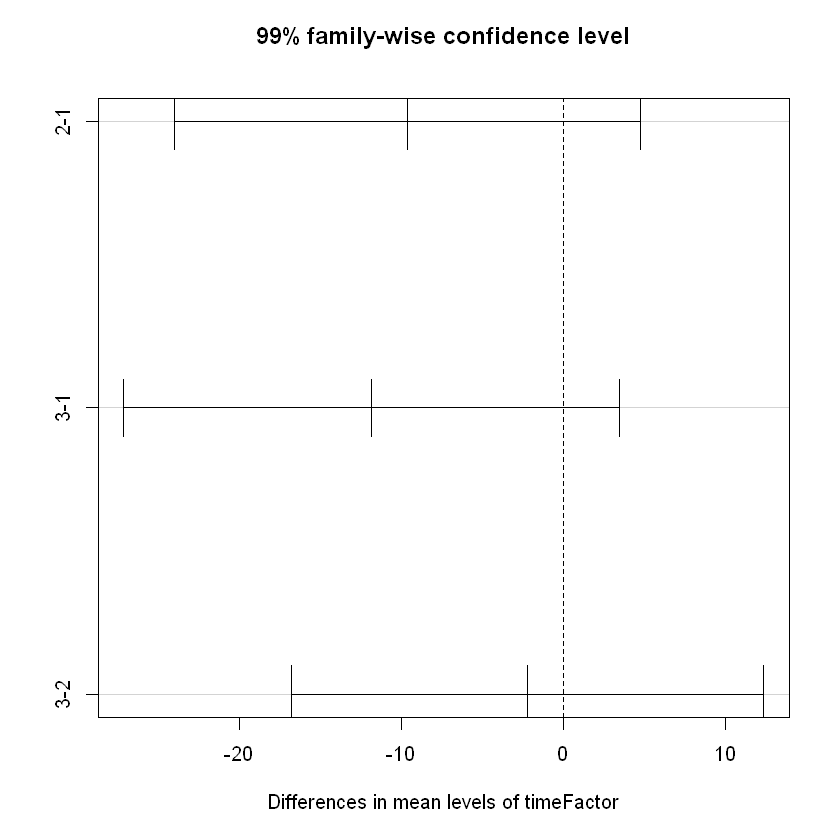

In [14]:
tk <- TukeyHSD(anovaResult, conf.level = 0.99)
plot(tk)

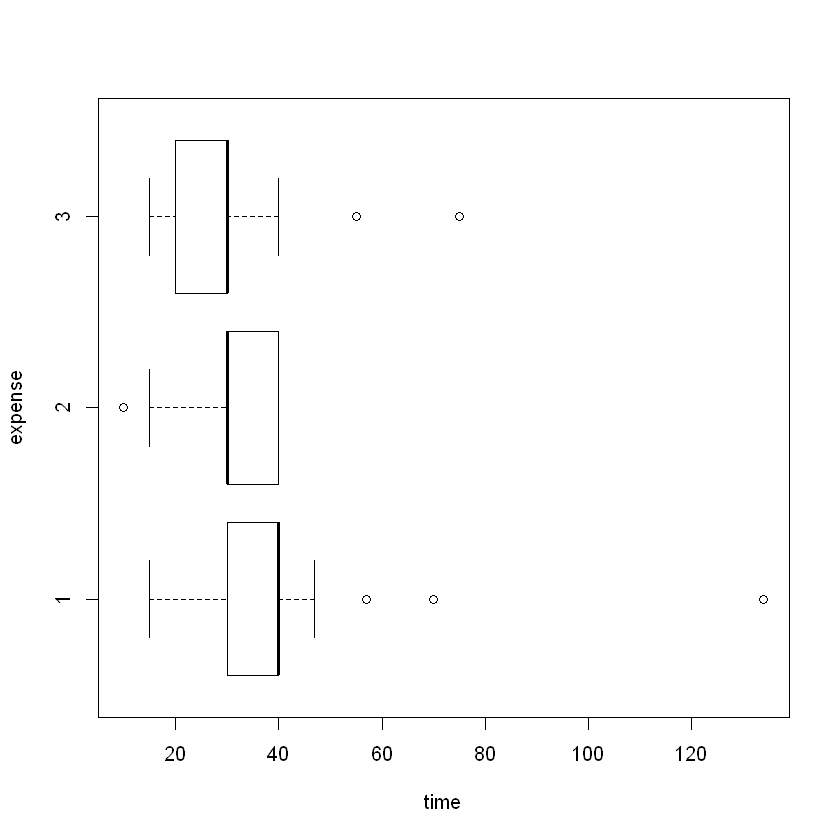

In [15]:
boxplot(df2$expense~df2$time, horizontal=T, xlab="time", ylab="expense")

#  
# Part 3.3 Anova on two factors

In [16]:
df3 <- read.csv("ass2_anova2.csv", sep=",", header=T, fileEncoding="UTF-8-BOM")

In [17]:
df3

expense,time,type
30,1,0
35,2,0
15,3,0
134,1,0
35,3,1
27,1,0
40,2,0
25,3,1
57,1,0
30,2,0


In [18]:
typeFactor <- factor(df3$type)
timeFactor <- factor(df3$time)
anovaResult <- aov(df3$expense ~ typeFactor + timeFactor, data=df3)
summary(anovaResult)

            Df Sum Sq Mean Sq F value  Pr(>F)   
typeFactor   2   2568  1284.0   4.992 0.00962 **
timeFactor   2    990   495.0   1.924 0.15418   
Residuals   65  16719   257.2                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [19]:
qf(0.01, 2, 65, lower.tail=F)

[1] 4.947413

In [20]:
qf(0.01, 2, 65, lower.tail=F)

[1] 4.947413

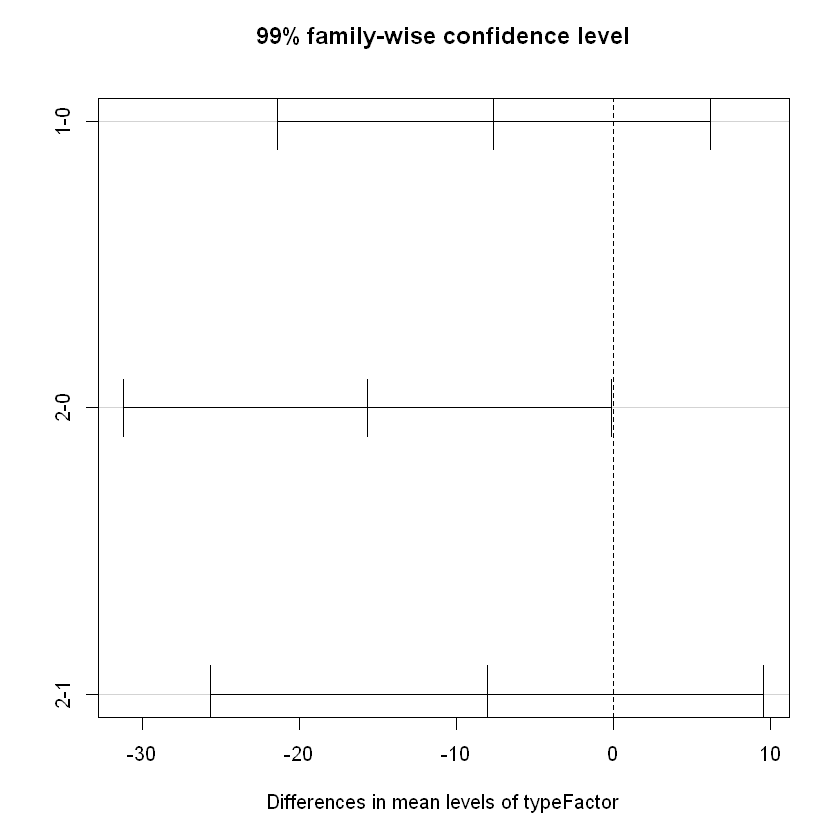

In [21]:
tk1 <- TukeyHSD(anovaResult, 'typeFactor', conf.level = 0.99)
plot(tk1)

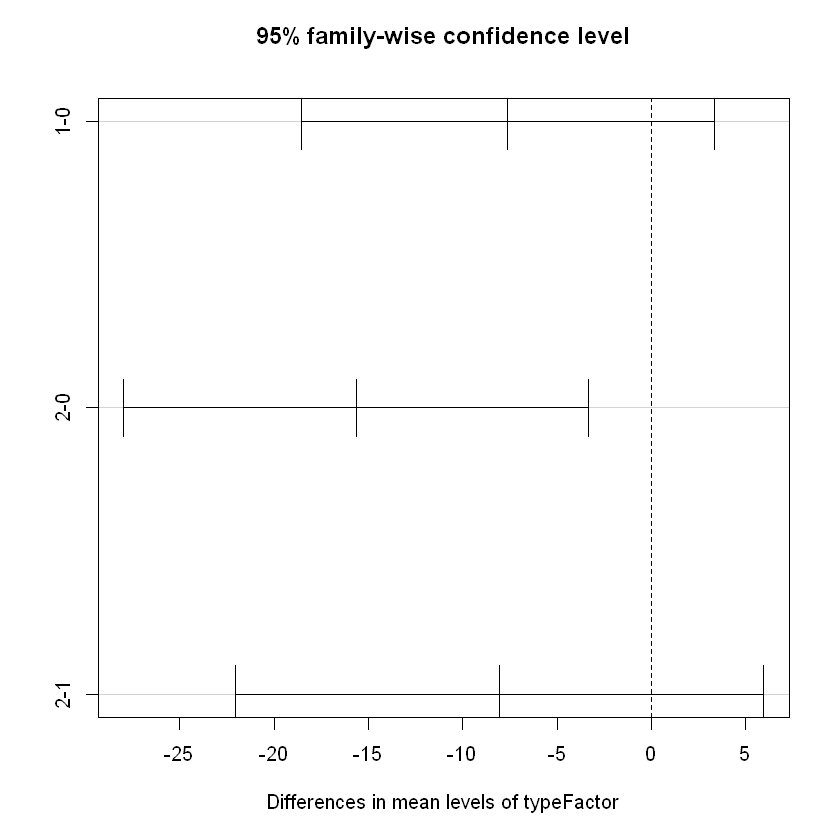

In [22]:
tk1 <- TukeyHSD(anovaResult, 'typeFactor', conf.level = 0.95)
plot(tk1)

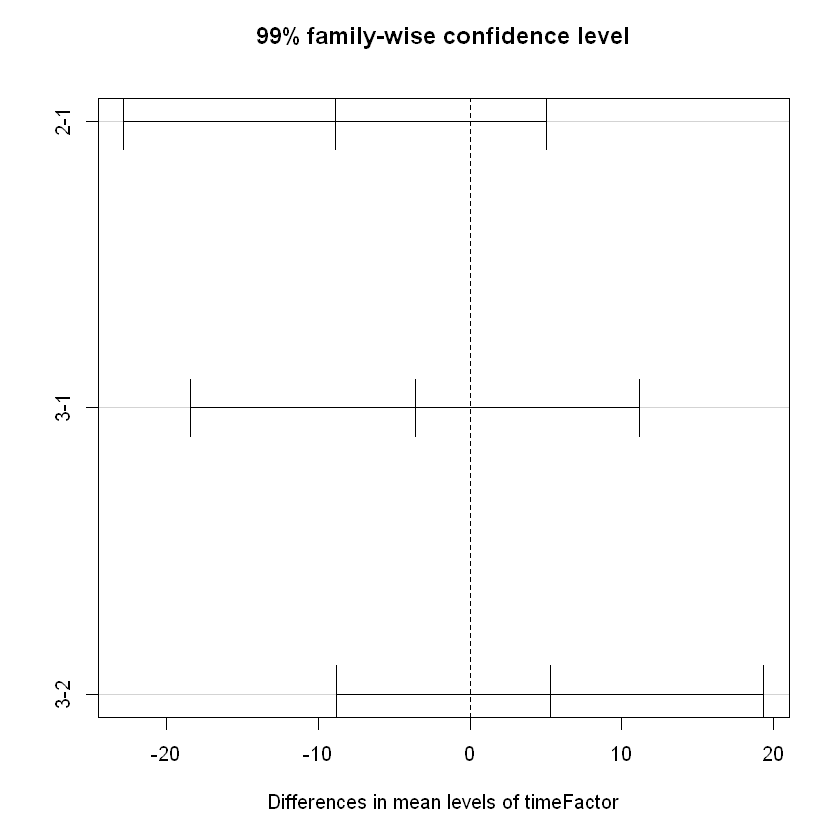

In [23]:
tk2 <- TukeyHSD(anovaResult, 'timeFactor', conf.level = 0.99)
plot(tk2)

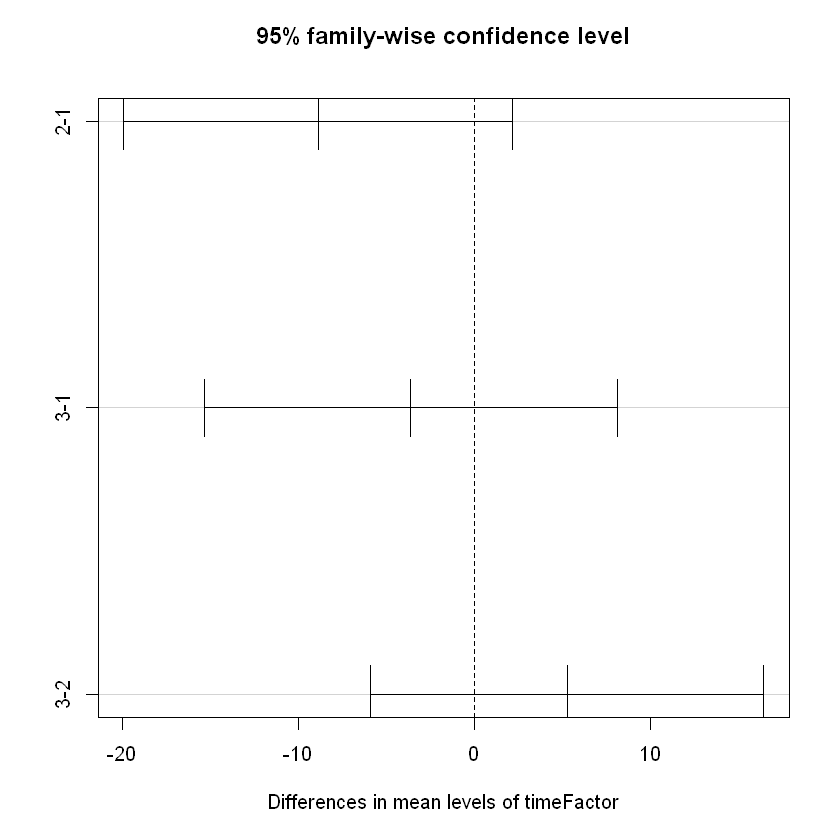

In [24]:
tk2 <- TukeyHSD(anovaResult, 'timeFactor', conf.level = 0.95)
plot(tk2)

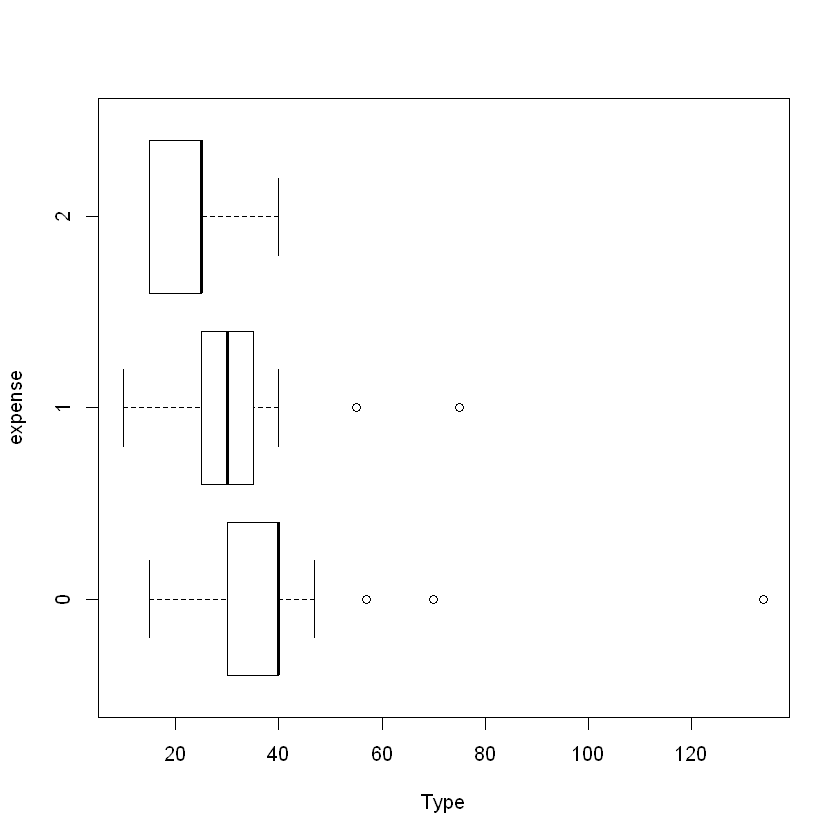

In [25]:
boxplot(df3$expense~df3$type, horizontal=T,xlab="Type", ylab="expense")

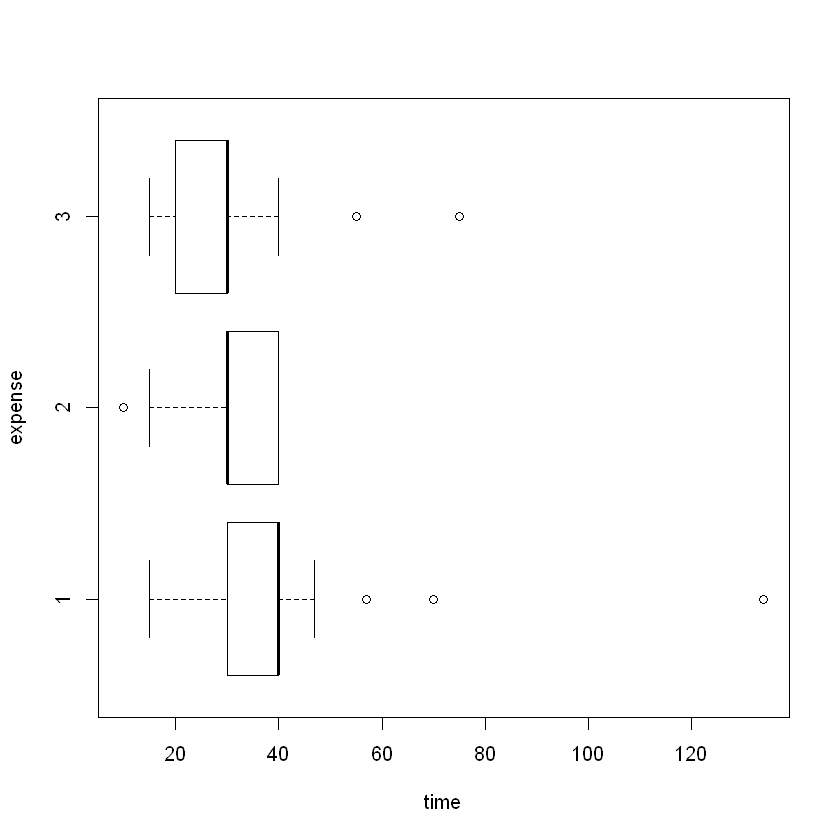

In [26]:
boxplot(df3$expense~df3$time, horizontal=T,xlab="time", ylab="expense")

# 
# 3.4 Categorical data analysis (homogeneity)

In [ ]:
#ย้ายไปใช้ python ค่ะ